# Area destruida por incêndio
Fonte: [https://dataserver-coids.inpe.br/queimadas/queimadas/area_queimada/AQ1km/csv/](https://dataserver-coids.inpe.br/queimadas/queimadas/area_queimada/AQ1km/csv/)

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Leitura do CSV
# Substitua 'https://dataserver-coids.inpe.br/queimadas/queimadas/area_queimada/AQ1km/csv/aq1km_biomas.csv' pelo caminho do seu arquivo
df = pd.read_csv('https://dataserver-coids.inpe.br/queimadas/queimadas/area_queimada/AQ1km/csv/aq1km_biomas.csv')

# 2. Remoção das Linhas "Total anual"
# Supondo que há uma coluna identificável, como "Ano" contendo "Total anual"
df = df[~df['Ano'].astype(str).str.contains('Total anual', na=False)]

# 3. Conversão de Tipos
# Transformação de ano e mês para inteiros
df['Ano'] = df['Ano'].astype(int)
df['Mês'] = df['Mês'].astype(int)

# Verifique se as colunas das regiões estão como números
regioes = ['Amazônia', 'Caatinga', 'Cerrado', 'Mata Atlântica', 'Pampa', 'Pantanal', 'Total mensal']
for regiao in regioes:
    df[regiao] = pd.to_numeric(df[regiao], errors='coerce')



## gerando os gráficos

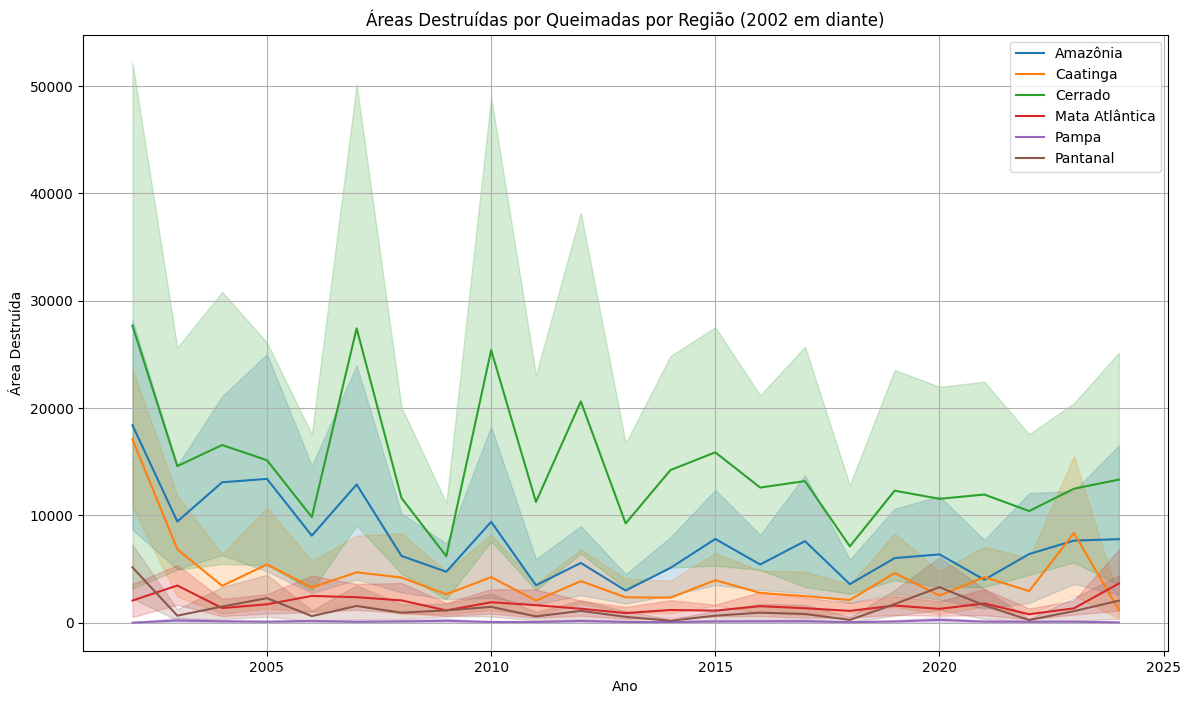

In [8]:
# 4. Geração de Gráficos

# Gráfico de Linhas: Áreas destruídas por região ao longo dos anos
plt.figure(figsize=(14, 8))
for regiao in regioes[:-1]:  # Exclui o 'Total mensal' do loop
    sns.lineplot(data=df, x='Ano', y=regiao, label=regiao)
plt.title('Áreas Destruídas por Queimadas por Região (2002 em diante)')
plt.xlabel('Ano')
plt.ylabel('Área Destruída')
plt.legend()
plt.grid(True)
plt.show()



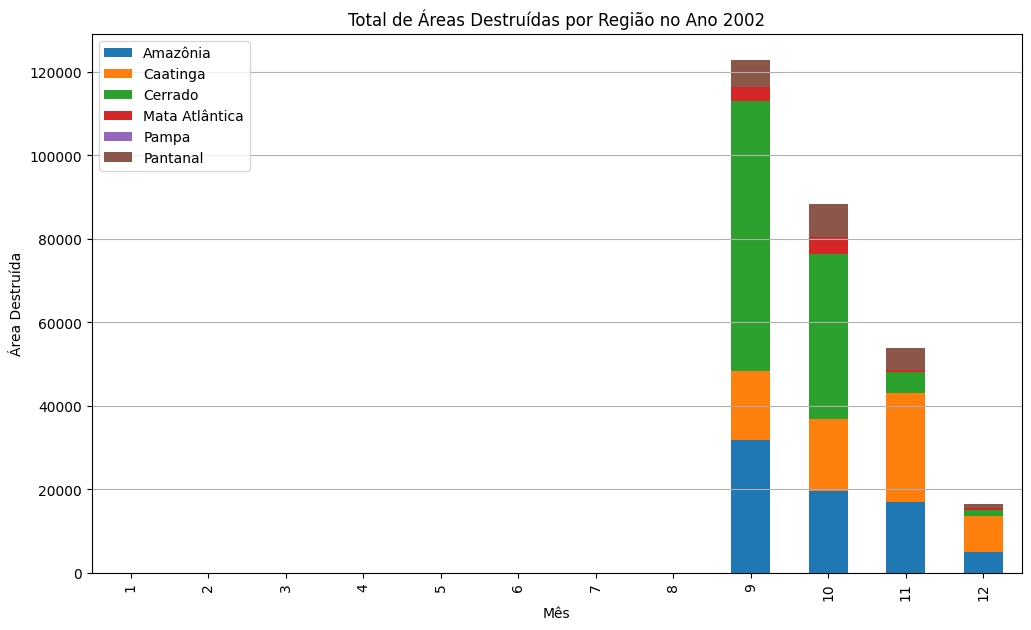

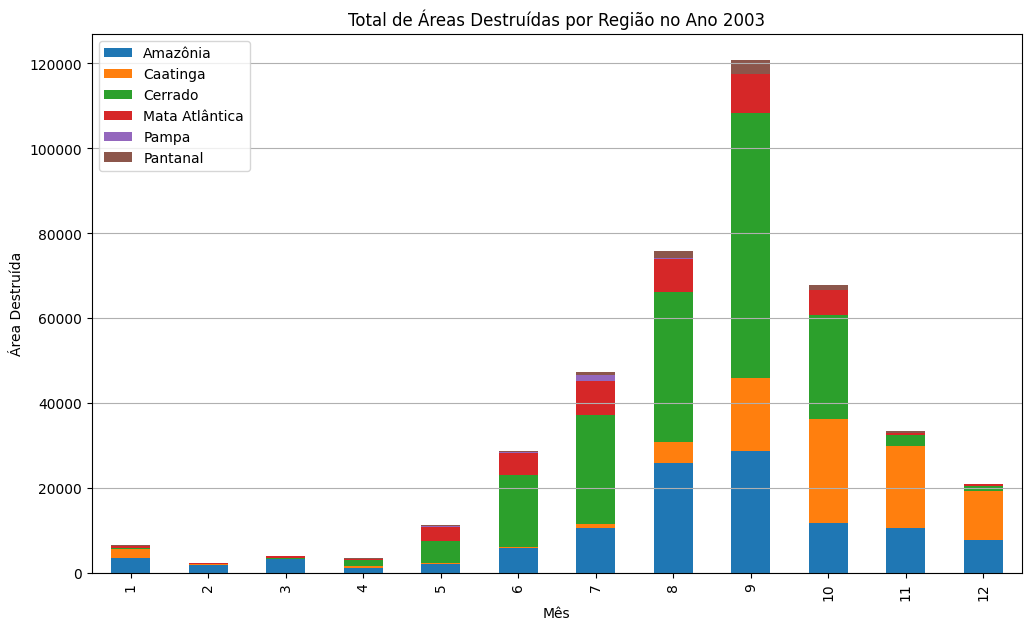

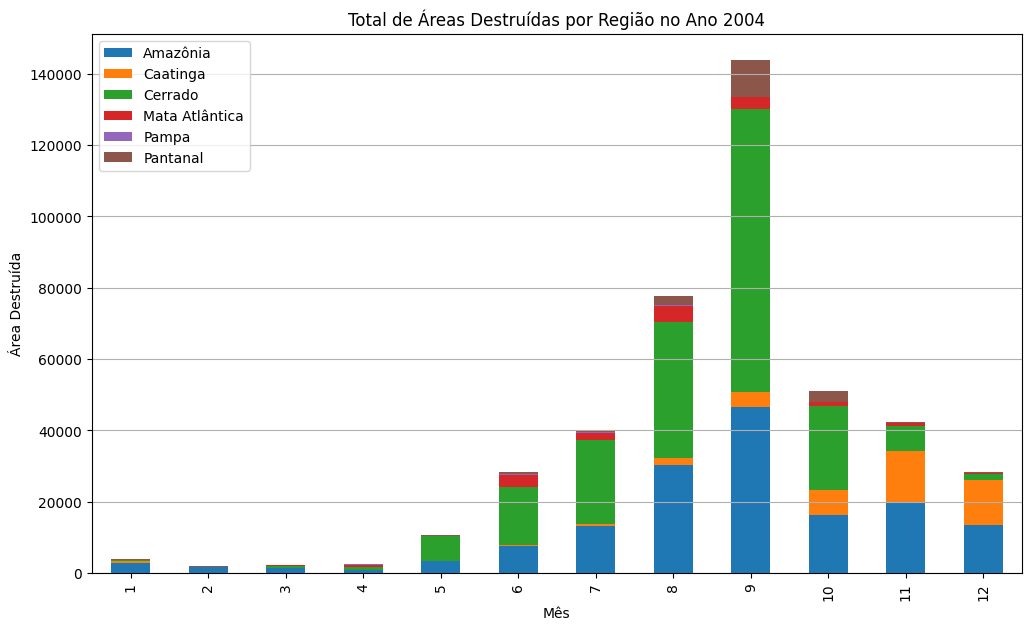

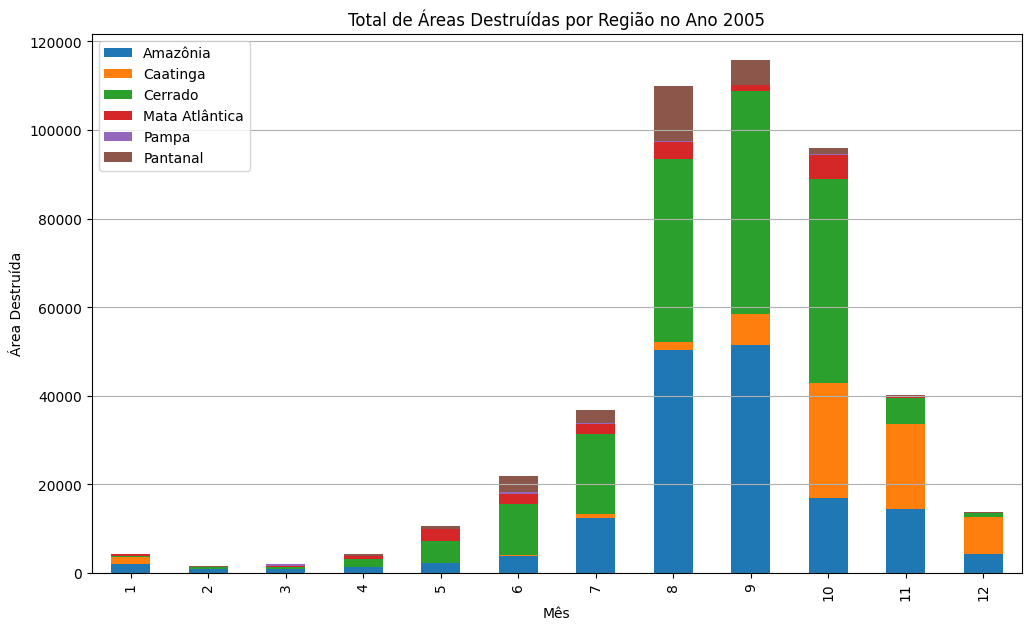

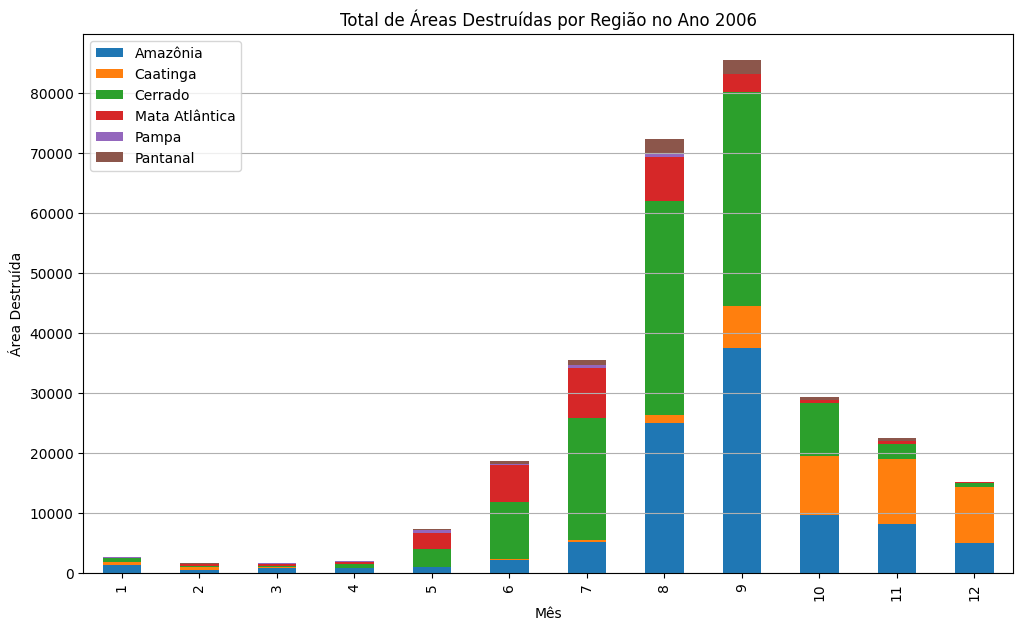

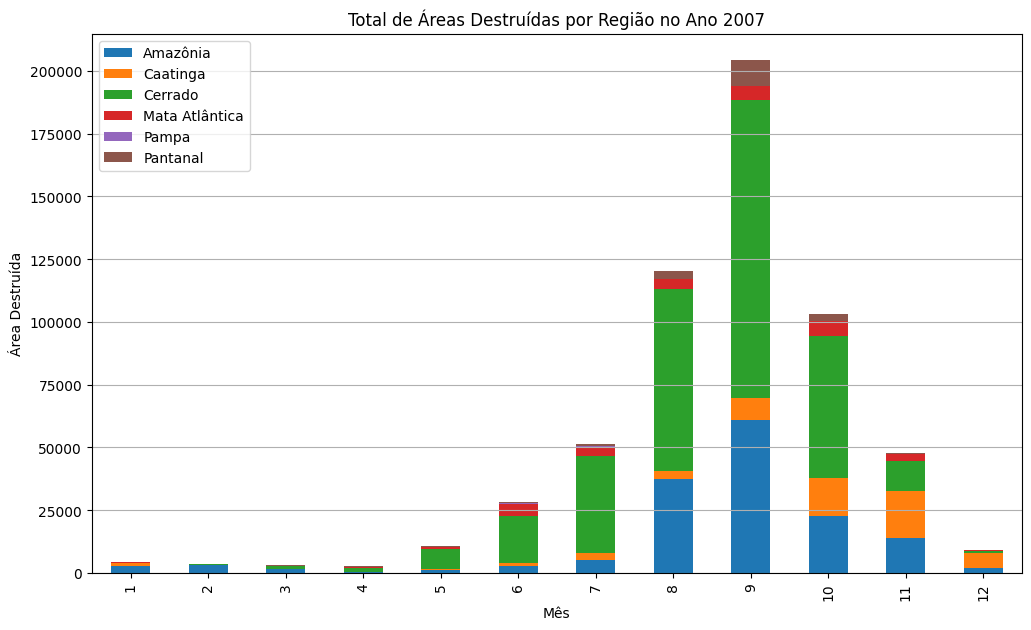

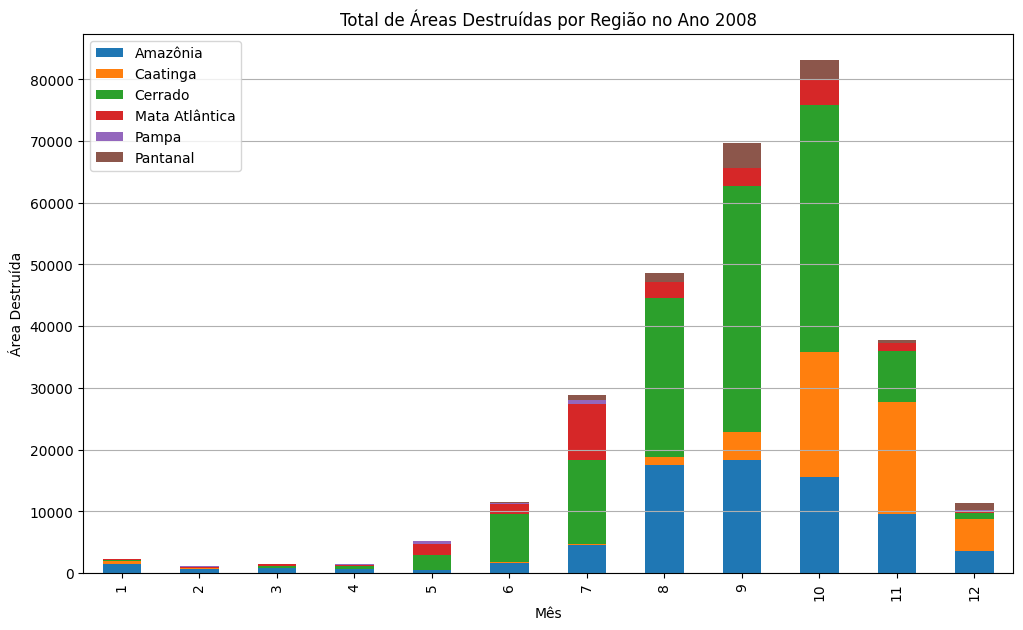

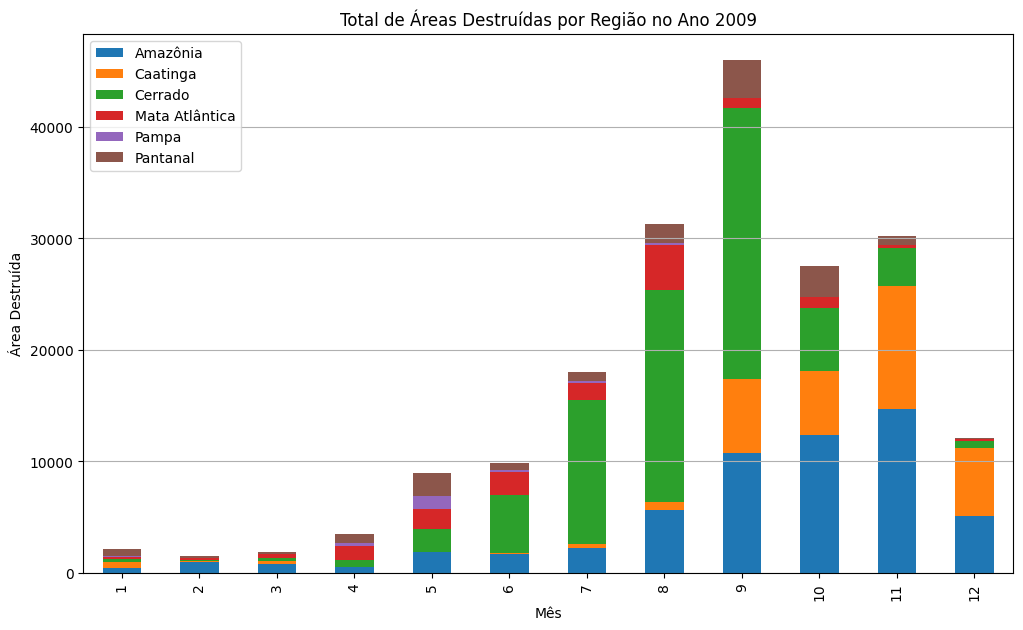

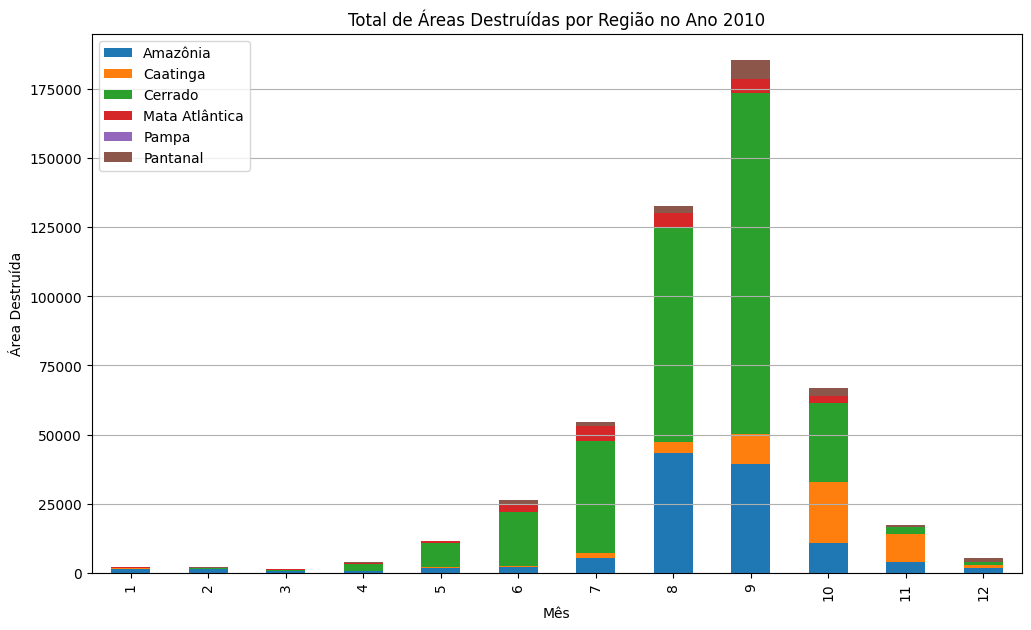

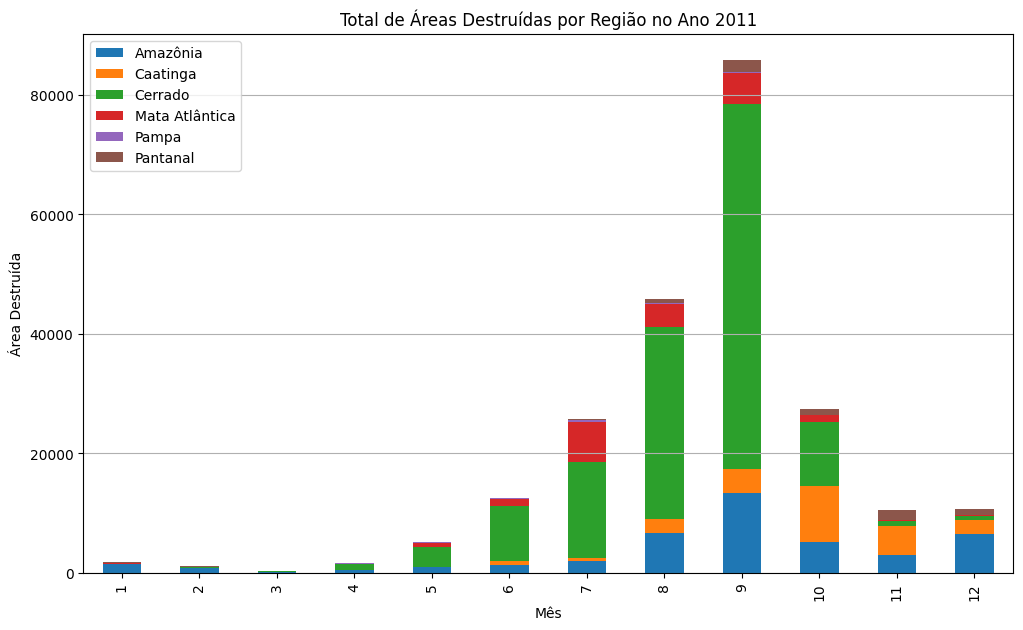

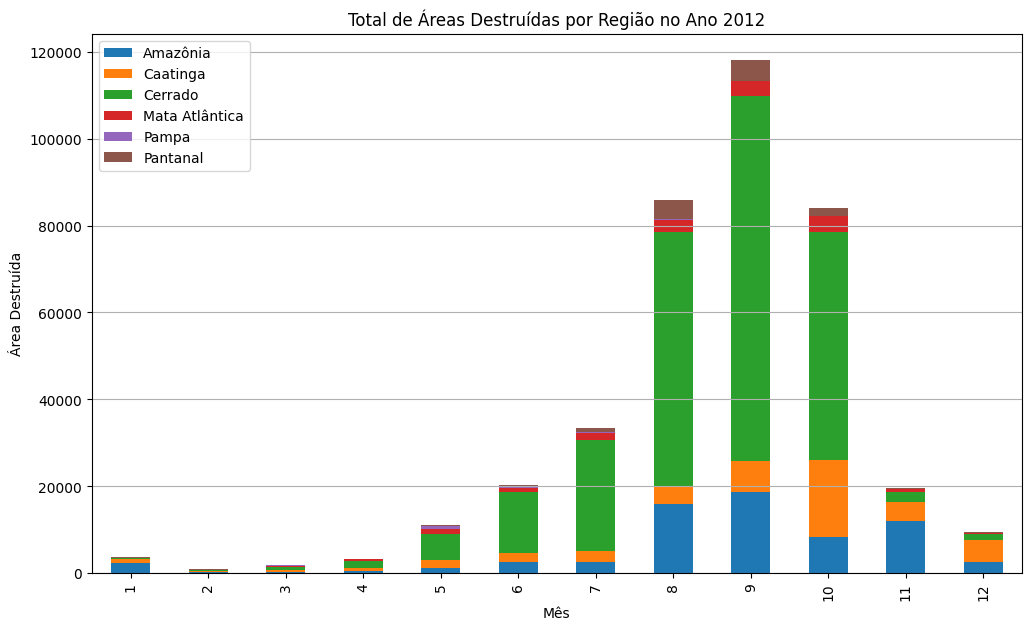

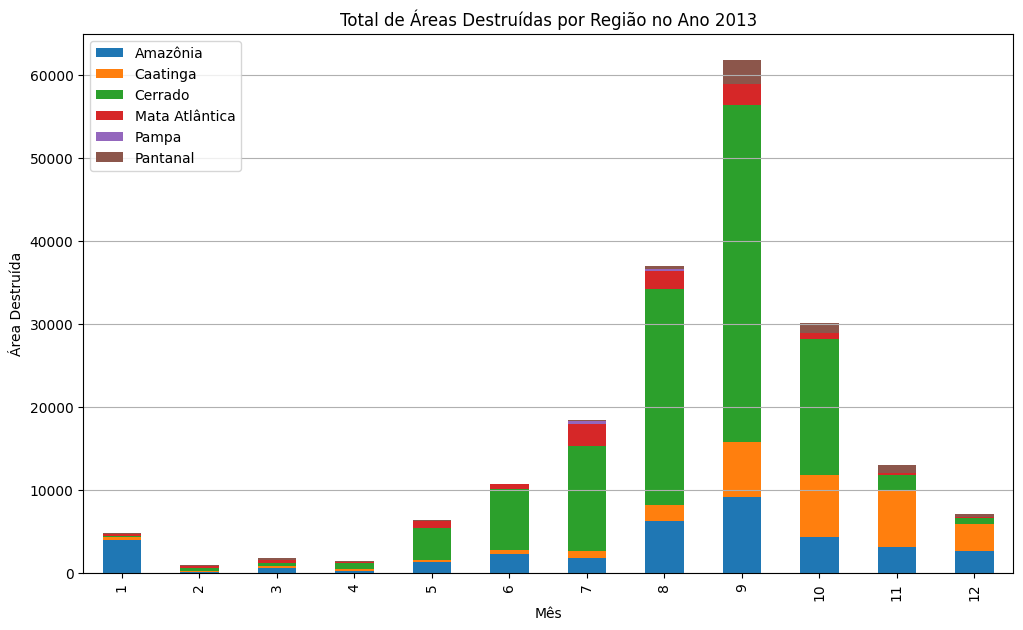

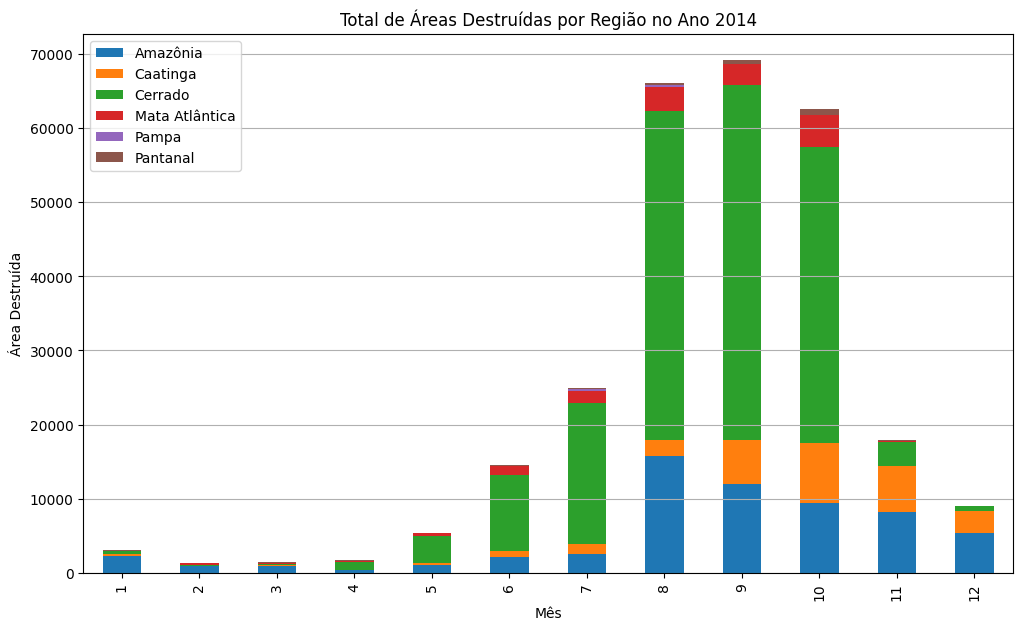

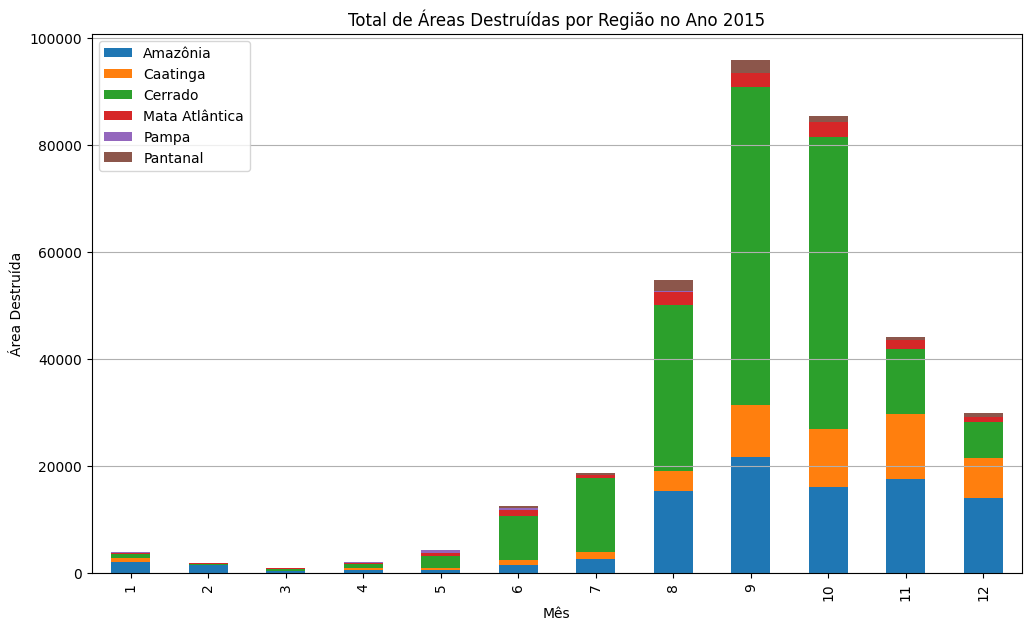

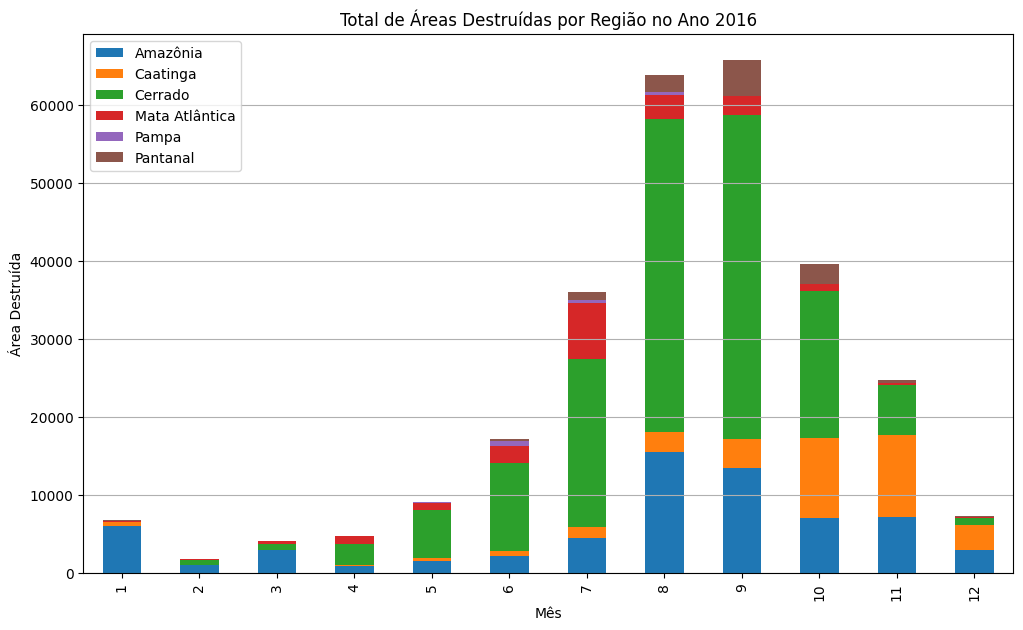

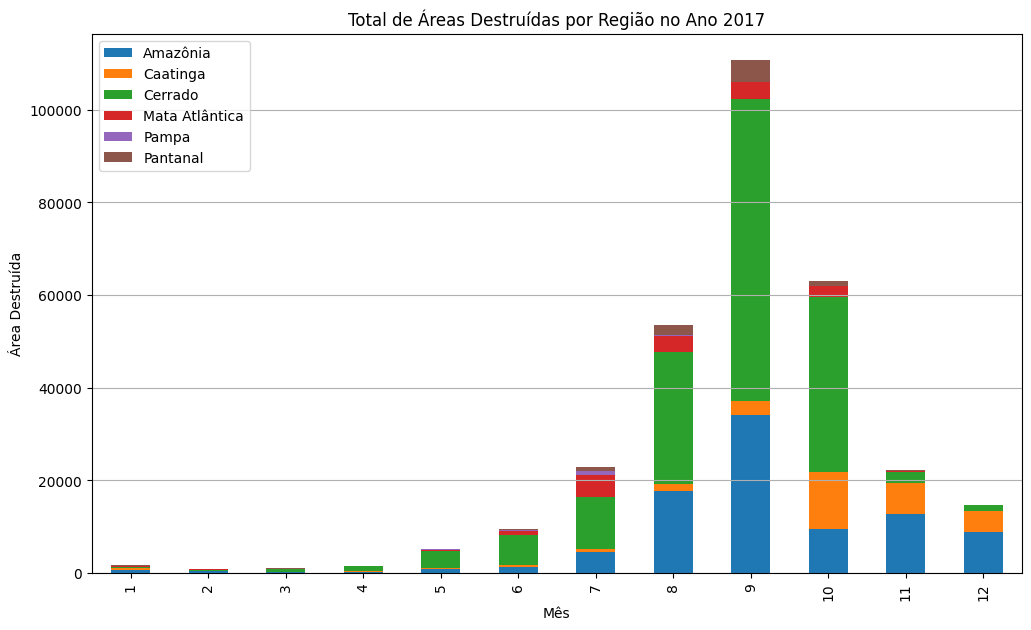

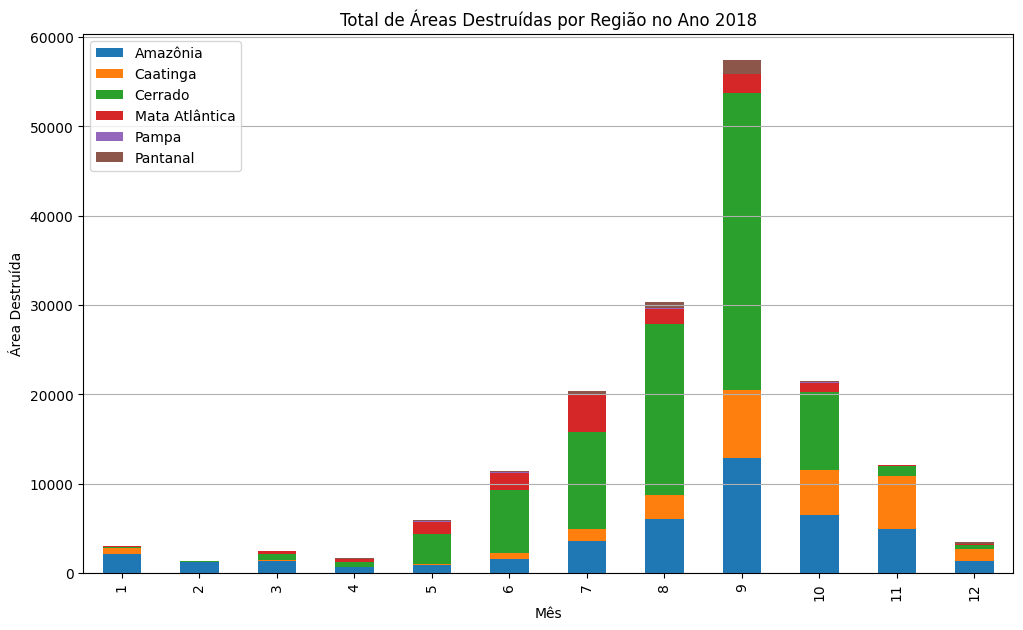

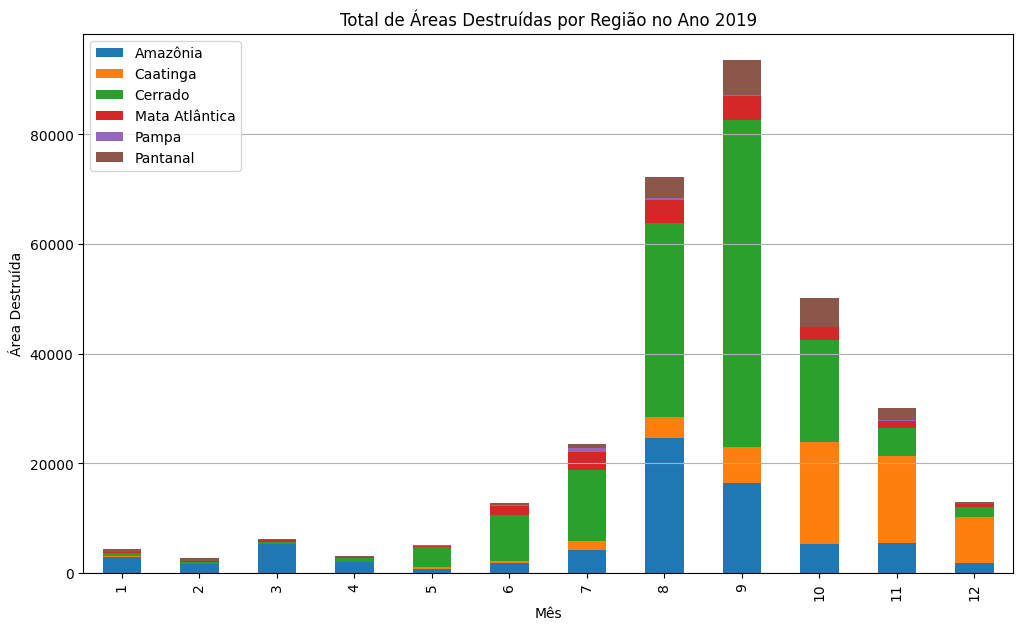

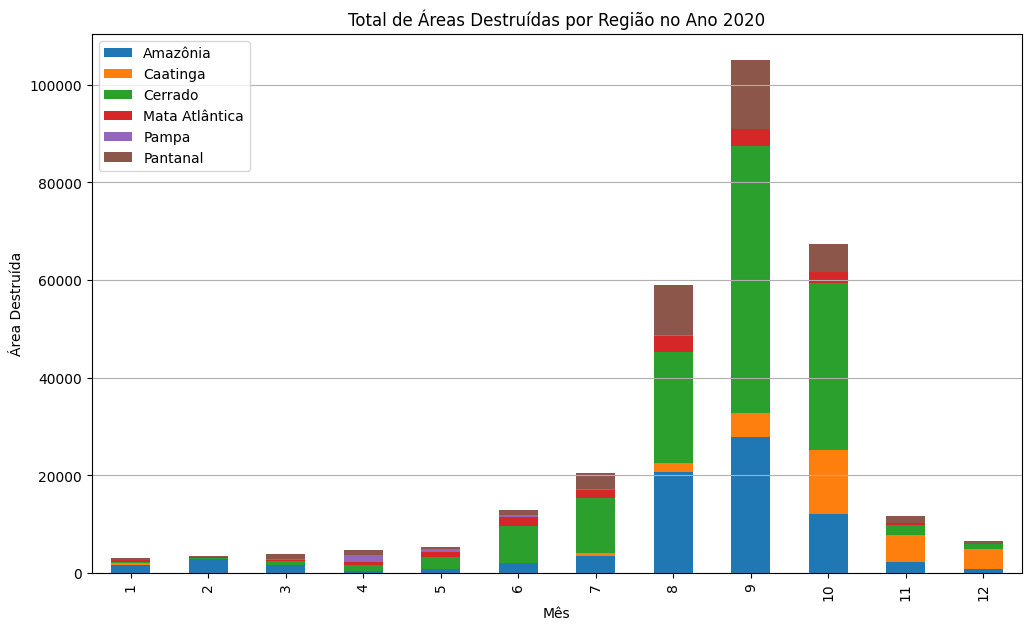

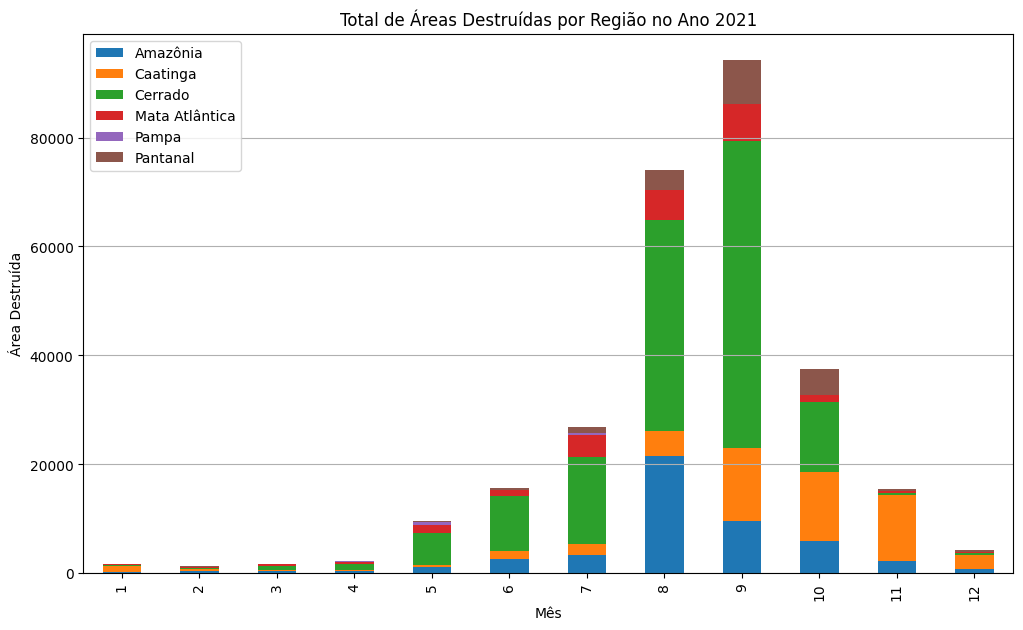

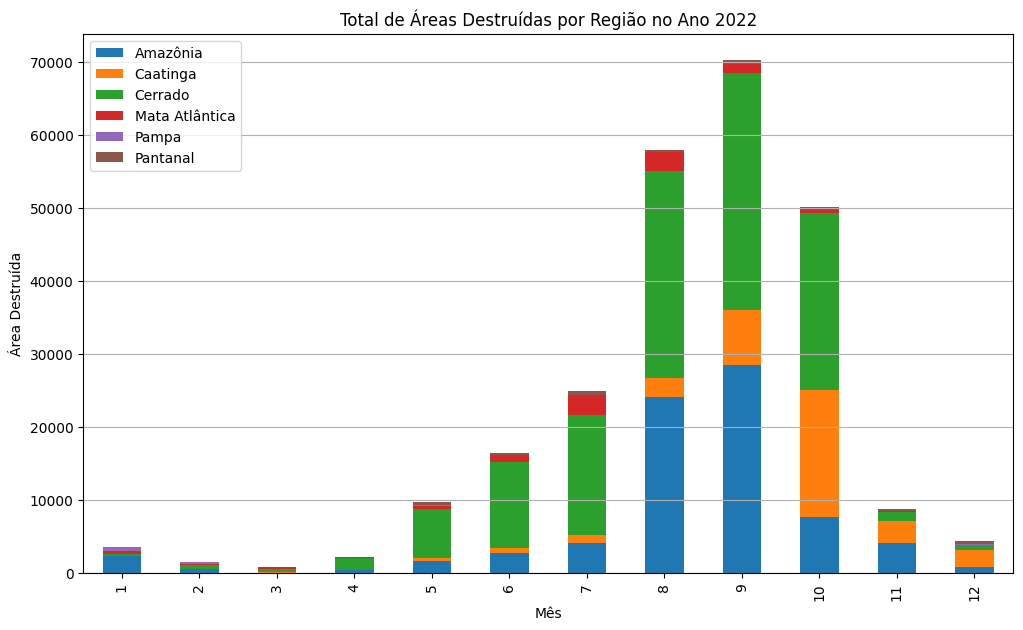

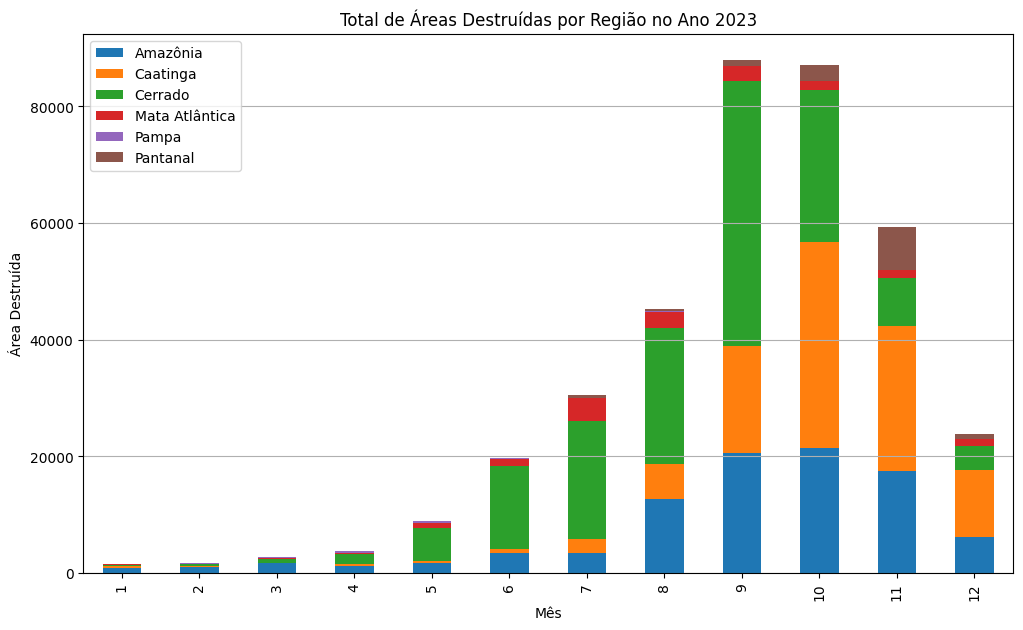

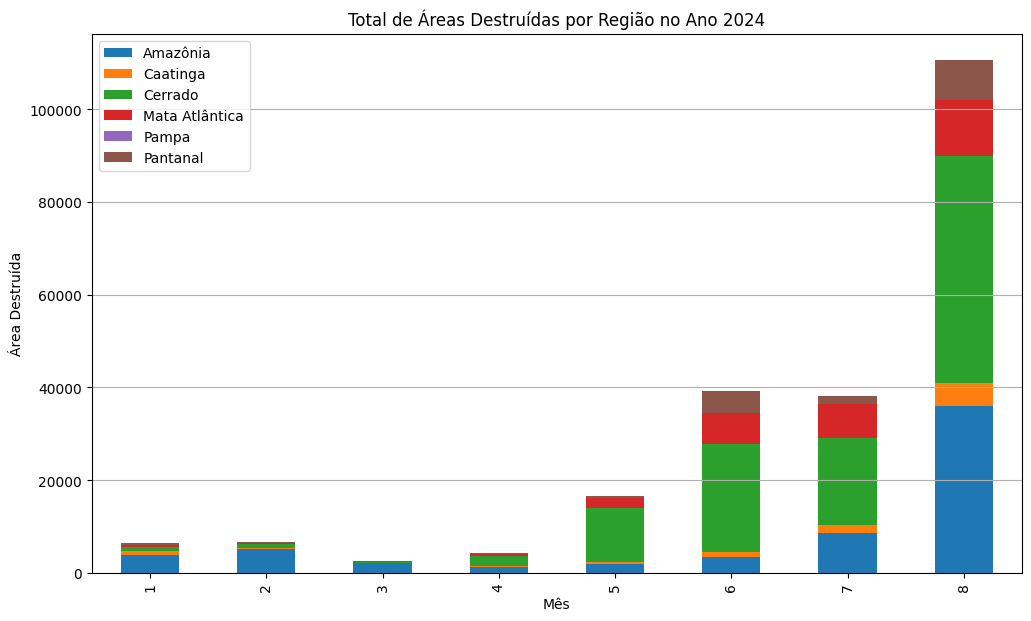

In [11]:
# Gráfico de Barras: Total de áreas destruídas por região em um ano específico (exemplo: 2020)
for ano in range(2002, 2025):
    ano_especifico = ano
    df_ano = df[df['Ano'] == ano_especifico].groupby('Mês')[regioes[:-1]].sum()
    df_ano.plot(kind='bar', stacked=True, figsize=(12, 7))
    plt.title(f'Total de Áreas Destruídas por Região no Ano {ano_especifico}')
    plt.xlabel('Mês')
    plt.ylabel('Área Destruída')
    plt.legend(loc='upper left')
    plt.grid(axis='y')
    plt.show()



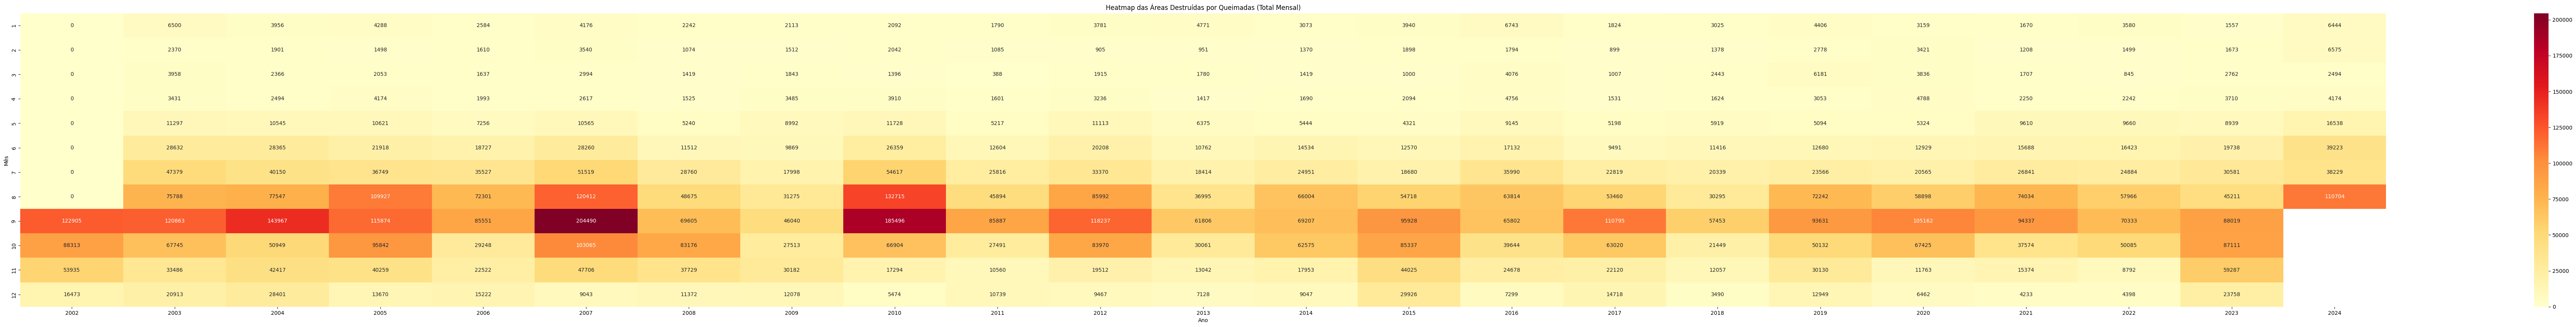

In [14]:
# Heatmap: Visualização das áreas destruídas por mês e por ano
plt.figure(figsize=(100, 10))
pivot_table = df.pivot_table(values='Total mensal', index='Mês', columns='Ano', aggfunc='sum')
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='YlOrRd')
plt.title('Heatmap das Áreas Destruídas por Queimadas (Total Mensal)')
plt.xlabel('Ano')
plt.ylabel('Mês')
plt.show()
